<a href="https://colab.research.google.com/github/kellyortiz/analise-preco-gasolina-mg/blob/main/analise_preco_gasolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload dos 3 arquivos CSV


Saving ca-2020-01.csv to ca-2020-01 (3).csv
Saving ca-2020-02.csv to ca-2020-02 (3).csv
Saving ca-2021-01.csv to ca-2021-01 (3).csv


/tmp/ipython-input-4-97641376.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("ca-2020-02.csv", sep=';', encoding='latin1')


Média antes do lockdown (até 15/03/2020): R$4.84
Média entre março e julho de 2021: R$5.85
Menor valor registrado: R$3.56
Maior valor registrado: R$7.00


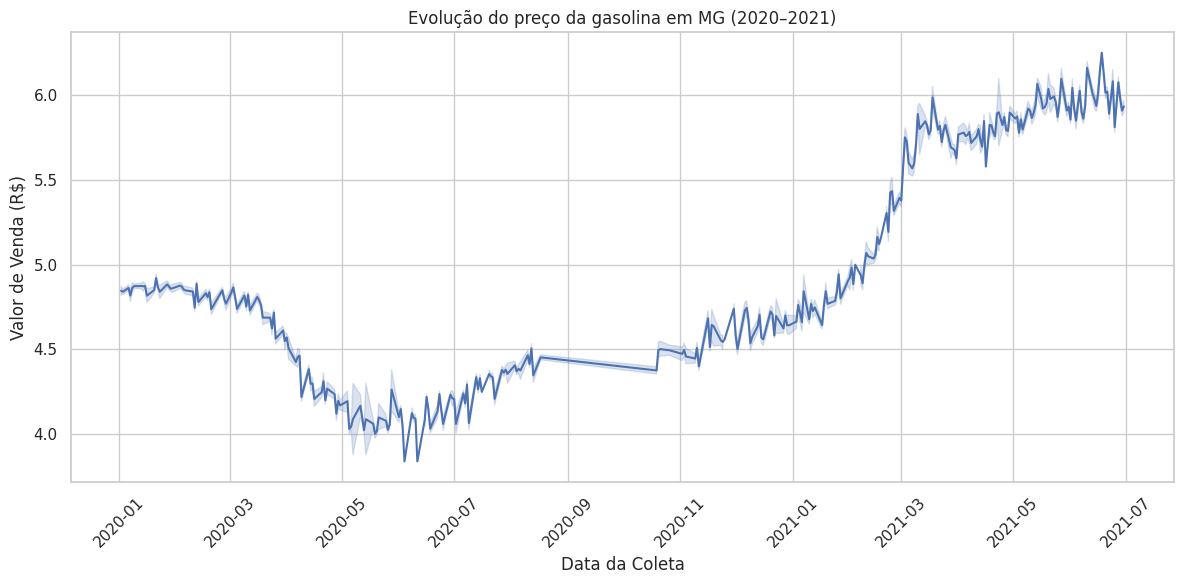

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

print("Faça upload dos 3 arquivos CSV")
uploaded = files.upload()

df1 = pd.read_csv("ca-2020-01.csv", sep=';', encoding='latin1')
df2 = pd.read_csv("ca-2020-02.csv", sep=';', encoding='latin1')
df3 = pd.read_csv("ca-2021-01.csv", sep=';', encoding='latin1')
dados = pd.concat([df1, df2, df3], ignore_index=True)

dados["Valor de Venda"] = dados["Valor de Venda"].str.replace(",", ".")
dados["Valor de Venda"] = pd.to_numeric(dados["Valor de Venda"], errors='coerce')
dados["Data da Coleta"] = pd.to_datetime(dados["Data da Coleta"], format="%d/%m/%Y", errors='coerce')

MGgas = dados[(dados['Produto'] == 'GASOLINA') & (dados['Estado - Sigla'] == 'MG')].copy()

colunas_nao_criticas = ['Numero Rua', 'Complemento', 'Bairro', 'Unidade de Medida', 'Bandeira']
MGgas[colunas_nao_criticas] = MGgas[colunas_nao_criticas].fillna(0)
MGgas.dropna(subset=['Valor de Venda', 'Data da Coleta'], inplace=True)

media_antes_lockdown = MGgas[MGgas['Data da Coleta'] <= '2020-03-15']['Valor de Venda'].mean()
media_pos_lockdown = MGgas[(MGgas['Data da Coleta'] >= '2021-03-01') &
                           (MGgas['Data da Coleta'] <= '2021-07-31')]['Valor de Venda'].mean()
menor_valor = MGgas['Valor de Venda'].min()
maior_valor = MGgas['Valor de Venda'].max()

print(f"Média antes do lockdown (até 15/03/2020): R${media_antes_lockdown:.2f}")
print(f"Média entre março e julho de 2021: R${media_pos_lockdown:.2f}")
print(f"Menor valor registrado: R${menor_valor:.2f}")
print(f"Maior valor registrado: R${maior_valor:.2f}")

# Gráfico com Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=MGgas, x='Data da Coleta', y='Valor de Venda')
plt.title("Evolução do preço da gasolina em MG (2020–2021)")
plt.xlabel("Data da Coleta")
plt.ylabel("Valor de Venda (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()